<a href="https://colab.research.google.com/github/szdziedzic/ai-course-project/blob/main/flight_prices_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight prices predictor

The goal of this project is to train couple of machine learning models to predict flight prices based on [this](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?resource=download) dataset and compare the results which they were able to achieve.

First let's load and analyze the dataset

In [68]:
import pandas as pd
import numpy as np

In [69]:
data = pd.read_csv('flights_data.csv', index_col=0)

In [70]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [71]:
data.shape

(300153, 11)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


According to kaggle website asociated with dataset linked above we can see what each of the columns mean:
```
1) Airline: The name of the airline company is stored in the airline column.
2) Flight: Flight stores information regarding the plane's flight code.
3) Source City: City from which the flight takes off.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time.
5) Stops: Stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. Keeps information about the arrival time.
7) Destination City: City where the flight will land.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.
```

In [73]:
for col in data.columns:
  print(f"Column: {col}")
  print(data[col].value_counts())
  print(f"Number of null values: {data[col].isnull().sum()}")
  print(f"Number of unique values in column: {data[col].nunique()}")
  print()

Column: airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
Number of null values: 0
Number of unique values in column: 6

Column: flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64
Number of null values: 0
Number of unique values in column: 1561

Column: source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
Number of null values: 0
Number of unique values in column: 6

Column: departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
Number of null values: 0
Number of unique values i

As we can see non of the columns have any missing data so it looks like dataset is pretty clean.

Let's analyze data in each column:
- `airline`: this column contains categorical data with 6 unique values
- `flight`:  this column contains categorical data with 1561 unique values
- `source_city`: this column contains categorical data with 6 unique values
- `departure_time`: this column contains categorical data with 6 unique values
- `stops`: this column contains categorical data with 3 unique values
- `arrival_time`: this column contains categorical data with 6 unique values
- `destination_city`: this column contains categorical data with 6 unique values
- `class`: this column contains categorical data with 2 unique values
- `durration`: this is numerical feature
- `price`: this is numerical feature
- `days_left`: this is numerical feature

In [74]:
import matplotlib.pyplot as plt

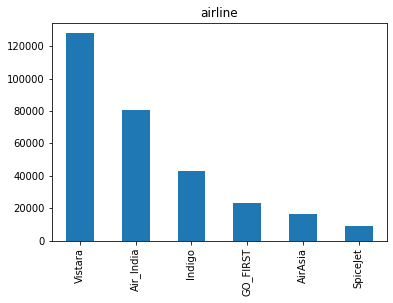

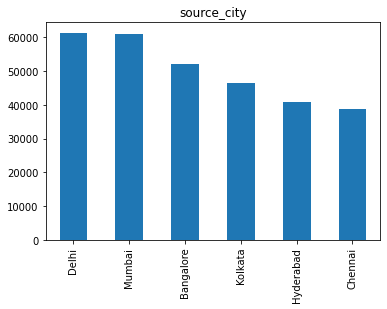

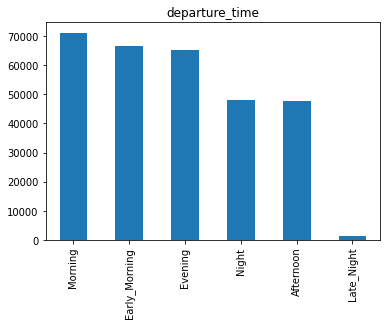

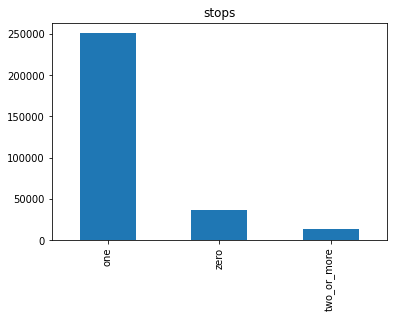

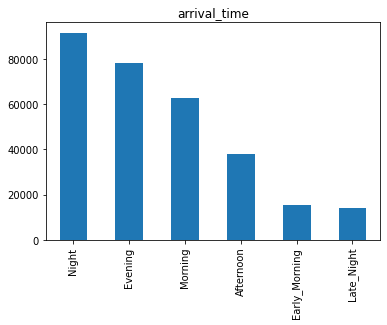

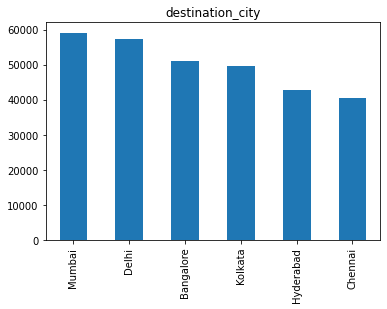

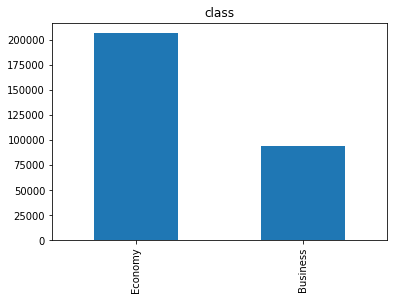

In [75]:
for col in ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]:
  data[col].value_counts().plot(kind="bar", title=col)
  plt.show()
  print()

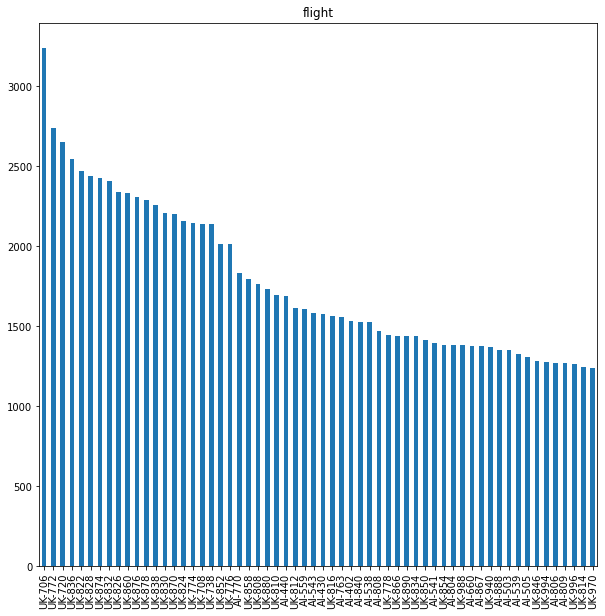

In [76]:
data["flight"].value_counts().nlargest(60).plot(kind="bar", title="flight", figsize=(10, 10))
plt.show()

We don't have any missing data in columns and we don't have columns which only have one value, so fortunately we can skip step of fixing it.

Let's make sure that all of the values in our columns are represented by numbers instead of the text

In [77]:
print("Data types and their frequency:")
data.dtypes.value_counts()

Data types and their frequency:


object     8
int64      2
float64    1
dtype: int64

We have 8 columns containing text values, let's change it

Data in `airline`, `flight`, `source_city` and `destination_city` is unordered data, so let's use `get_dummies` method to create separate column for each of the values in these columns

In [78]:
unordered_data_columns = ["airline", "flight", "source_city", "destination_city"]
dummy_df = pd.get_dummies(data[unordered_data_columns])
dummy_df.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,flight_6E-105,flight_6E-113,flight_6E-121,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [79]:
data = pd.concat([data, dummy_df], axis=1)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,...,1,0,0,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,...,1,0,0,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,...,1,0,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,...,1,0,0,0,0,0,0,0,0,1


Let's drop old columns

In [80]:
data = data.drop(unordered_data_columns, axis=1)

In [81]:
data.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Evening,zero,Night,Economy,2.17,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Early_Morning,zero,Morning,Economy,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Morning,zero,Afternoon,Economy,2.25,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Morning,zero,Morning,Economy,2.33,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Now let's focus on categorical columns with ordered data like `departure_time`, `stops`, `arrival_time` and `class`. We can change data in these columns into numerical type using the data's order.

In [82]:
mapping_dict = {
    "departure_time": {
        "Early_Morning": 1,
        "Morning": 2,
        "Afternoon": 3,
        "Evening": 4,
        "Night": 5,
        "Late_Night": 6,
    },
    "stops": {
        "zero": 0,
        "one": 1,
        "two_or_more": 2
    },
    "arrival_time": {
        "Early_Morning": 1,
        "Morning": 2,
        "Afternoon": 3,
        "Evening": 4,
        "Night": 5,
        "Late_Night": 6,
    },
    "class": {
         "Economy": 1,
         "Business": 2
    }
}
data = data.replace(mapping_dict)
data[["departure_time","stops", "arrival_time", "class"]].head()

,departure_time,stops,arrival_time,class
0,4,0,5,1
1,1,0,2,1
2,1,0,1,1
3,2,0,3,1
4,2,0,2,1


In [83]:
print("Data types and their frequency:")
data.dtypes.value_counts()

Data types and their frequency:


uint8      1579
int64         6
float64       1
dtype: int64

Column: departure_time
2    71146
1    66790
4    65102
5    48015
3    47794
6     1306
Name: departure_time, dtype: int64


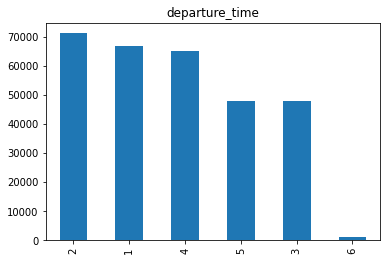


Column: stops
1    250863
0     36004
2     13286
Name: stops, dtype: int64


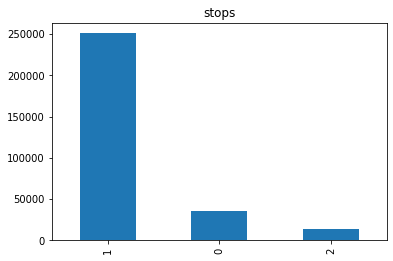


Column: arrival_time
5    91538
4    78323
2    62735
3    38139
1    15417
6    14001
Name: arrival_time, dtype: int64


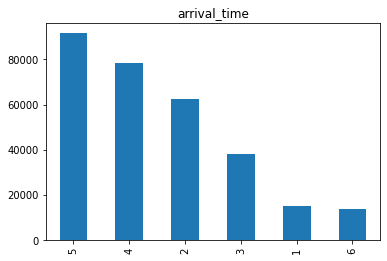


Column: class
1    206666
2     93487
Name: class, dtype: int64


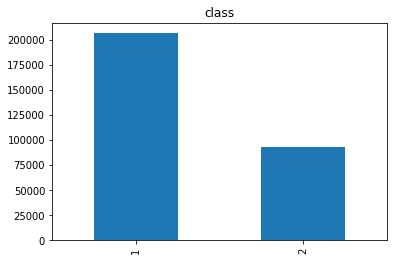

In [85]:
for col in ["departure_time", "stops", "arrival_time", "class"]:
  print(f"Column: {col}")
  print(data[col].value_counts())
  data[col].value_counts().plot(kind="bar", title=col)
  plt.show()
  print()

Now we have successfully converted all of the columns into numerical type data. Let's save the data.

In [86]:
data.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,4,0,5,1,2.17,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,2,1,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,1,1,2.17,1,5956,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2,0,3,1,2.25,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2,0,2,1,2.33,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [87]:
data.to_csv("cleaned_flights_data.csv", index=True)